# Raster Plot Functions

In [98]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta

In [99]:
#Download data
df1 = pd.read_csv("Practice 3_data1.csv")

### Clean and transform data frame to useable format

Overall Goal: raster figure with day-to-day plots containing activity (no. of crossings) on the y-axis and time (hour) on the x-axis.

Necessary components: 
    - Readable and callable time and date information
    - Time elapsed in hours
    - Days elapsed or day labels

In [100]:
#Combine Date and Time to one, new column
df1["date_time"] = df1["Date"] + " " + df1["Time"]
df1["date_time"] = pd.to_datetime(df1["date_time"])

In [101]:
#Add new time elapsed column
x = pd.to_datetime(df1["date_time"])- pd.to_datetime(df1.at[0, "date_time"])
df1["timedelta"] = x
#Convert time elapsed into hours
df1["time_hour"] = df1["timedelta"].dt.total_seconds().div(3600)

In [102]:
#Add days elasped column
days = pd.to_datetime(df1["date_time"])- pd.to_datetime(df1.at[0, "date_time"])
df1["days_since"] = days
df1["days_since"] = df1["days_since"].dt.days

## Function that filters data frame

In [103]:
def period_data(frame, data, timedata, timeperiod1, timeperiod2):
    y = frame[data].loc[(frame[timedata]>=timeperiod1) & (frame[timedata]<=timeperiod2)]
    x = frame[timedata].loc[(frame[timedata]>=timeperiod1) & (frame[timedata]<=timeperiod2)]
    return x, y

In [104]:
period_data(df1, "s2", "time_hour", 0, 24)

(0        0.000000
 1        0.016667
 2        0.033333
 3        0.050000
 4        0.066667
           ...    
 1436    23.933333
 1437    23.950000
 1438    23.966667
 1439    23.983333
 1440    24.000000
 Name: time_hour, Length: 1441, dtype: float64,
 0       3
 1       3
 2       1
 3       5
 4       0
        ..
 1436    0
 1437    0
 1438    0
 1439    0
 1440    0
 Name: s2, Length: 1441, dtype: int64)

## Function that plots data into Raster plot

In [105]:
def one_raster(frame, activitydata, timedata, timeperiod1, timeperiod2, xlabel, ylabel):
    time, activity = period_data(frame, activitydata, timedata, timeperiod1, timeperiod2)
    plt.figure(figsize=(7,1))
    plot = plt.plot(time, activity, color='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return plot

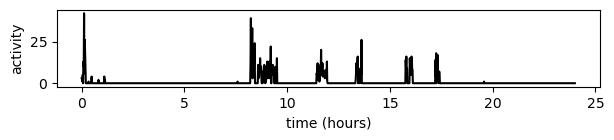

In [106]:
one_raster(df1, "s2", "time_hour", 0, 24, "time (hours)", "activity")

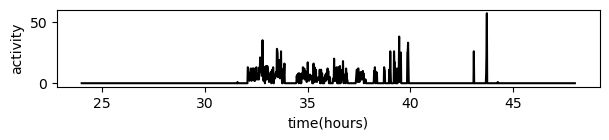

In [107]:
one_raster(df1, "s2", "time_hour", 24, 48, "time(hours)", "activity")